In [4]:
import pandas as pd

#biliotecas para extração e visualização
import numpy as np
import matplotlib.pyplot as plt

## Verificação do sinal
Encontrou-se um valor destoante de ac2rad em 'vertical-misalignment/0.63mm/61.8496.csv'

In [5]:
# dados no tempo
signals = pd.read_csv('../mafaulda/vertical-misalignment/0.63mm/61.8496.csv', header=None, 
                      names=['tacometro','ac1rad','ac1ax','ac1tg','ac2rad','ac2ax','ac2tg','microfone'])

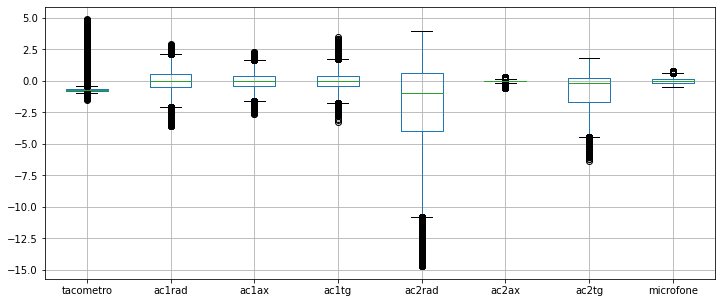

In [6]:
signals.boxplot(figsize=(12,5))
plt.show()

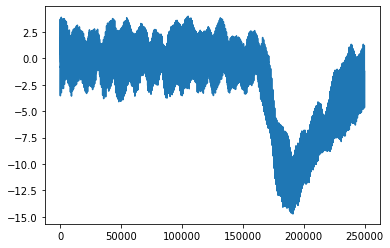

In [7]:
signals['ac2rad'].plot()

# Corrigindo o DataFrame
Deve ser rodado uma única vez.

In [10]:
df = pd.read_csv('../data.csv')
columns = list(df.columns)

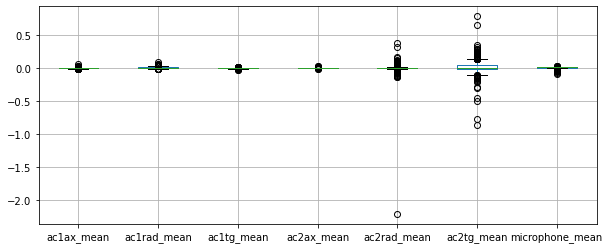

In [11]:
medias = [col for col in columns if 'mean' in col]
df[medias].boxplot(figsize=(10,4))
plt.show()

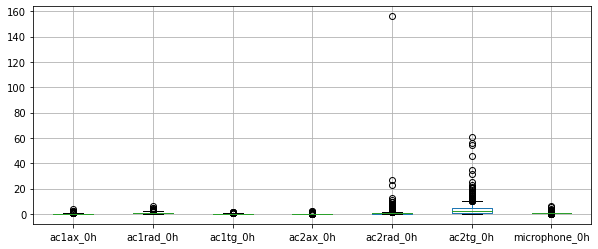

In [12]:
harmonico0 = [col for col in columns if '0h' in col]
df[harmonico0].boxplot(figsize=(10,4))
plt.show()

O valor de média elevado em termos absolutos também causa um pico na frequência em f=0. Este também deve ser corrigido 

In [13]:
# encpntrando o outlier para ac2rad_mean
df.iloc[df['ac2rad_mean'].argmin()][['defect_type', 'ver_mis', 'rot_vel', 'ac2rad_mean', 'ac2rad_0h']]

defect_type    ver_mis
ver_mis           0.63
rot_vel        61.8496
ac2rad_mean   -2.20599
ac2rad_0h      155.987
Name: 346, dtype: object

In [14]:
# após a correção o valor retornado mudará! O valor original é 346
index = df['ac2rad_mean'].argmin()
index

346

In [15]:
df.at[346, 'ac2rad_mean'] = df['ac2rad_mean'].mean()
df.at[346, 'ac2rad_0h'] = df['ac2rad_0h'].mean()

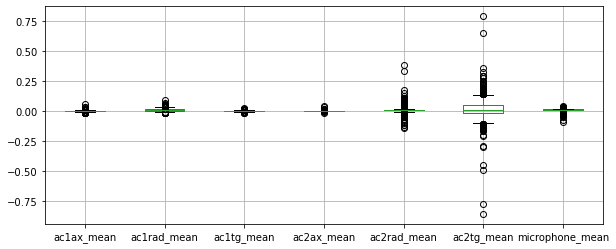

In [17]:
df[medias].boxplot(figsize=(10,4))
plt.show()

In [18]:
f = open("../data.csv", "w")
df.to_csv(f, line_terminator='\n', index=False)
f.close()

## Checagem final

In [19]:
df_NEW = pd.read_csv('../data.csv')

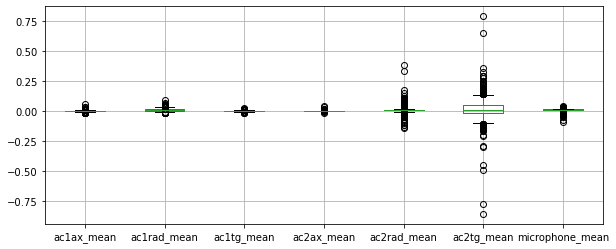

In [20]:
df_NEW[medias].boxplot(figsize=(10,4))
plt.show()